# pandas的基礎操作
- 現在可以更深入於資料的分析和操作資料
- 基本操作
    * 重新建立列或欄的索引 - reindexing
    * 刪除部份欄或列 - Dropping Entries from an Axis
    * 使用索引,切割,過濾技術，截取想獲得的資料 - indexing,selection,and Filtering
    * 整數的索引 - integer Indexes
    * 資料集的數學運算 - Arithmetic and Data Alignment
    * 使用function,lambda方法,讀取每一個cell,或欄或列 - Function Application and Mapping
    * 排序資料和排名資料 - Sorting and Ranking
    * 查詢索引是否有重覆的標籤 - Axes indexes with Duplicate Labels
    
- 總合和統計描素 - Summarizing and Computing Descriptive Statistics
    * 相關係數(correlation) and 共變異數(Covariance)
    * 單獨值,值的數量和成員 - Uinque Values, value Counts, and Membership

## 使用reindex()重新建立符合需求的新索引資料集

In [2]:
import pandas as pd
import numpy as np

obj = pd.Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj
'''
Out[1]: 
d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64
'''

#使用reindex()方法,重新規劃新索引,並產生新的資料集
#沒有索引到的資料會被移除
#新增的索引會使用 NaN
obj2 = obj.reindex(['a', 'c', 'd', 'e'])
obj2
'''
Out[2]: 
a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64
'''

#使用引數名稱method='ffill',向前填滿資料
obj3 = pd.Series(['blue', 'purple', 'yellow'], index=[0, 2, 4])
obj3
'''
Out[4]: 
0      blue
2    purple
4    yellow
dtype: object
'''

obj3.reindex(range(6), method='ffill')
'''
Out[5]: 
0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object
'''


'\nOut[5]: \n0      blue\n1      blue\n2    purple\n3    purple\n4    yellow\n5    yellow\ndtype: object\n'

In [3]:
#DataFrame使用reindex()
#reindex()可以重新建立列的索引外,也可以重新建立欄的索引標籤

frame = pd.DataFrame(np.arange(9).reshape(3, 3),
                    index=['a', 'c', 'd'],
                    columns=['台北', '台中', '高雄'])
frame
'''
Out[6]: 
   台北  台中  高雄
a   0   1   2
c   3   4   5
d   6   7   8
'''

#使用reindex()新增row
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2
'''
Out[7]: 
    台北   台中   高雄
a  0.0  1.0  2.0
b  NaN  NaN  NaN
c  3.0  4.0  5.0
d  6.0  7.0  8.0
'''

#使用reindex()移除row
frame2 = frame.reindex(['a', 'c'])
frame2
'''
Out[8]: 
   台北  台中  高雄
a   0   1   2
c   3   4   5
'''

#使用reindex()的columns引數名稱,同時更改index和新增移除column
states = ['台北', '高雄', '台南']
frame2 = frame.reindex(['a', 'c'],columns=states)
frame2
'''
Out[9]: 
    台北   高雄  台南
a  0.0  2.0 NaN
c  3.0  5.0 NaN
'''


'\nOut[9]: \n    台北   高雄  台南\na  0.0  2.0 NaN\nc  3.0  5.0 NaN\n'

## 使用drop()移除欄或列(當列或欄的數量非常多時)

- 只有移除,不能重新排列順序
- 會建立新的物件
- reindex()是從現有資料選取想要的欄和列，並建立新的資料
- drop()是從現在資料刪除不要的資料，並建立新的資瞪


In [4]:
#Series
obj = pd.Series(np.arange(5.),index=['a', 'b', 'c', 'd', 'e'])
obj
'''
Out[10]: 
a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64
'''

#使用drop()方法移除一個列索引
new_obj = obj.drop('c')
new_obj

#使用drop()方法移除多個索引
new_obj = obj.drop(['d', 'c'])
new_obj
'''
Out[11]: 
a    0.0
b    1.0
e    4.0
dtype: float64
'''

#DataFrame
data = pd.DataFrame(np.arange(16).reshape(4,4),
                   index=['台北','台中', '台南', '高雄'],
                   columns=['one', 'two', 'three', 'four'])
data
'''
Out[12]: 
    one  two  three  four
台北    0    1      2     3
台中    4    5      6     7
台南    8    9     10    11
高雄   12   13     14    15
'''

#drop()預設是移除row
dropData = data.drop(['台北','台中'])
dropData
'''
Out[13]: 
    one  two  three  four
台南    8    9     10    11
高雄   12   13     14    15
'''

#使用引數名稱axis=1或axis='columns'移除欄
dropData = data.drop('two', axis=1)
dropData
'''
Out[15]: 
    one  three  four
台北    0      2     3
台中    4      6     7
台南    8     10    11
高雄   12     14    15
'''

drapData = data.drop(['two', 'four'], axis='columns')
drapData
'''
Out[16]: 
    one  three
台北    0      2
台中    4      6
台南    8     10
高雄   12     14
'''

#如果是要移除原始資料,必需使用引數名稱inplace=True
data.drop('台北', inplace=True)
data
'''
Out[17]: 
    one  two  three  four
台中    4    5      6     7
台南    8    9     10    11
高雄   12   13     14    15
'''

'\nOut[17]: \n    one  two  three  four\n台中    4    5      6     7\n台南    8    9     10    11\n高雄   12   13     14    15\n'

## 索引、選取、過濾

In [5]:
#Series的索引(obj[...])類似於ndarray,除了series的索引沒有限定整數,還可以是字串
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
obj

'''
Out[18]: 
a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64
'''

#使用索引
obj[1]
'''
Out[19]: 1.0
'''

#使用slice()
obj[2:4]
'''
Out[20]: 
c    2.0
d    3.0
dtype: float64
'''

#使用list,index的值
obj[['b', 'a', 'd']]
'''
Out[21]: 
b    1.0
a    0.0
d    3.0
dtype: float64
'''

#使用list,索引
obj[[1, 3]]
'''
Out[22]: 
b    1.0
d    3.0
dtype: float64
'''

#使用boolean series來過瀘
obj[obj < 2]
'''
Out[23]: 
a    0.0
b    1.0
dtype: float64
'''

#使用標籤的slice,不同於整數的slice,最後一個是包含的
obj['b':'c']
'''
Out[24]: 
b    1.0
c    2.0
dtype: float64
'''

#也可使用選取時,給值
obj['b': 'c'] = 5
obj
'''
Out[25]: 
a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64
'''

'\nOut[25]: \na    0.0\nb    5.0\nc    5.0\nd    3.0\ndtype: float64\n'

In [6]:
#DataFrame的索引,主要是取出1個或多個欄位而不是row,取出一個欄位所取出的是Series
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                   index=['台北','台中','台南', '高雄'],
                   columns=['one', 'two', 'three', 'four'])
data
'''
Out[27]: 
    one  two  three  four
台北    0    1      2     3
台中    4    5      6     7
台南    8    9     10    11
高雄   12   13     14    15
'''

#取出一欄,是Series
data['two']
'''
Out[28]: 
台北     1
台中     5
台南     9
高雄    13
Name: two, dtype: int64
'''

#使用list取出多欄,取出的是DataFrame
data[['three', 'one']]
'''
Out[29]: 
    three  one
台北      2    0
台中      6    4
台南     10    8
高雄     14   12
'''

#使用數值的slice是取出row,只可以使用slice方式
#不可以只有索引

data[:2]
'''
    one  two  three  four
台北    0    1      2     3
台中    4    5      6     7
'''

#使用boolean series做為選取
'''
Out[34]: 
    one  two  three  four
台中    4    5      6     7
台南    8    9     10    11
高雄   12   13     14    15
'''

#使用boolean dataFrame做為選取
data < 5
'''
Out[35]: 
      one    two  three   four
台北   True   True   True   True
台中   True  False  False  False
台南  False  False  False  False
高雄  False  False  False  False
'''

data[data<5] = 0
data
'''
Out[36]: 
    one  two  three  four
台北    0    0      0     0
台中    0    5      6     7
台南    8    9     10    11
高雄   12   13     14    15
'''

'\nOut[36]: \n    one  two  three  four\n台北    0    0      0     0\n台中    0    5      6     7\n台南    8    9     10    11\n高雄   12   13     14    15\n'

### 使用loc,iloc選取
- loc[,]使用標籤索引
- iloc[,]使用整數索引

In [7]:
import numpy as np
import pandas as pd

data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                   index=['台北','台中','台南', '高雄'],
                   columns=['one', 'two', 'three', 'four'])
data
'''
Out[39]: 
    one  two  three  four
台北    0    1      2     3
台中    4    5      6     7
台南    8    9     10    11
高雄   12   13     14    15
'''

#如果要使用標籤名稱索引列,必需使用loc[列,欄]
data.loc['台北',['two', 'three']]
'''
Out[40]: 
two      1
three    2
Name: 台北, dtype: int64
'''


#使用整數索引值,請使用iloc
data.iloc[2,[3, 0, 1]]
'''
Out[41]: 
four    11
one      8
two      9
Name: 台南, dtype: int64
'''

#使用iloc取出整列
data.iloc[2]
'''
Out[42]: 
one       8
two       9
three    10
four     11
Name: 台南, dtype: int64
'''

#使用iloc
data.iloc[[1, 2],[3, 0, 1]]
'''
Out[43]: 
    four  one  two
台中     7    4    5
台南    11    8    9
'''

#使用loc配合標籤slice語法
data.loc[:'台南','two']
'''
In [5]: data.loc[:'台南','two']                                                 
Out[5]: 
台北    1
台中    5
台南    9
Name: two, dtype: int64
'''
#小心,自動參生的索引標籤
ser = pd.Series(np.arange(3.))

#loc包含標籤1
ser.loc[:1]
'''
Out[6]: 
0    0.0
1    1.0
dtype: float64
'''

#不包含索引1
ser.iloc[:1]
'''
Out[7]: 
0    0.0
dtype: float64
'''

'\nOut[7]: \n0    0.0\ndtype: float64\n'

#### homework1

[將各鄉鎮市區人口密度修改成為理想的樞紐分析表](Homework1.ipynb)

[covid-19資料的搜尋](Homework3.ipynb)

## 數學運算和資料對齊

In [8]:
import pandas as pd
import numpy as np

#如果2個pandas資料集運算,但有不同的索引標籤
s1 = pd.Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])

s1
'''
Out[12]: 
a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64
'''

s2
'''
a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64
'''

#運算時使用標籤對齊
s1+s2
'''
Out[14]: 
a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64
'''


'\nOut[14]: \na    5.2\nc    1.1\nd    NaN\ne    0.0\nf    NaN\ng    NaN\ndtype: float64\n'

In [9]:
#dataFrame數學運算時同時對齊row和columns標籤
#
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)),
                  columns=list('bcd'),
                  index=['台北','台中','台南'])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                  columns = list('bde'),
                  index=['高雄','台北','台中','台南'])
df1
'''
Out[16]: 
      b    c    d
台北  0.0  1.0  2.0
台中  3.0  4.0  5.0
台南  6.0  7.0  8.0
'''

df2
'''
Out[17]: 
      b     d     e
高雄  0.0   1.0   2.0
台北  3.0   4.0   5.0
台中  6.0   7.0   8.0
台南  9.0  10.0  11.0
'''

#同時row,column標籤對齊
df1 + df2
'''
       b   c     d   e
台中   9.0 NaN  12.0 NaN
台北   3.0 NaN   6.0 NaN
台南  15.0 NaN  18.0 NaN
高雄   NaN NaN   NaN NaN
'''

#相同row,不同的column標籤對齊
df1 = pd.DataFrame({'A':[1, 2]})
df2 = pd.DataFrame({'B':[3, 4]})

df1
'''
Out[20]: 
   A
0  1
1  2
'''

df2
'''
Out[21]: 
   B
0  3
1  4
'''

df1-df2
'''
    A   B
0 NaN NaN
1 NaN NaN
'''

'\n    A   B\n0 NaN NaN\n1 NaN NaN\n'

#### 數學運算時，同時填滿沒有對齊的儲存格

In [10]:
#add()方法配合fill_value引數名稱
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
                  columns=list('abcd'))
df2 = pd.DataFrame(np.arange(20.).reshape((4, 5)),
                  columns=list('abcde'))
df2.loc[1, 'b'] = np.nan
df1
'''
Out[26]: 
     a    b     c     d
0  0.0  1.0   2.0   3.0
1  4.0  5.0   6.0   7.0
2  8.0  9.0  10.0  11.0
'''

df2
'''
Out[27]: 
      a     b     c     d     e
0   0.0   1.0   2.0   3.0   4.0
1   5.0   NaN   7.0   8.0   9.0
2  10.0  11.0  12.0  13.0  14.0
3  15.0  16.0  17.0  18.0  19.0
'''

df1 + df2
'''
Out[30]: 
      a     b     c     d   e
0   0.0   2.0   4.0   6.0 NaN
1   9.0   NaN  13.0  15.0 NaN
2  18.0  20.0  22.0  24.0 NaN
3   NaN   NaN   NaN   NaN NaN
'''

#是先將每一個DataFrame先擴展成相同寬高,沒有值的填入0
#而不是加總完才將nan填0
df1.add(df2, fill_value=0)
'''
Out[29]: 
      a     b     c     d     e
0   0.0   2.0   4.0   6.0   4.0
1   9.0   5.0  13.0  15.0   9.0
2  18.0  20.0  22.0  24.0  14.0
3  15.0  16.0  17.0  18.0  19.0
'''

1 / df1
'''
Out[31]: 
       a         b         c         d
0    inf  1.000000  0.500000  0.333333
1  0.250  0.200000  0.166667  0.142857
2  0.125  0.111111  0.100000  0.090909
'''

#rdiv多加一個r,使相除位置相反
df1.rdiv(1)
'''
Out[32]: 
       a         b         c         d
0    inf  1.000000  0.500000  0.333333
1  0.250  0.200000  0.166667  0.142857
2  0.125  0.111111  0.100000  0.090909
'''

#使用reindex()擴充Series或DataFrame也可以使用索引名稱fill_value
df1.reindex(columns=df2.columns, fill_value=0)
'''
Out[33]: 
     a    b     c     d  e
0  0.0  1.0   2.0   3.0  0
1  4.0  5.0   6.0   7.0  0
2  8.0  9.0  10.0  11.0  0
'''

'\nOut[33]: \n     a    b     c     d  e\n0  0.0  1.0   2.0   3.0  0\n1  4.0  5.0   6.0   7.0  0\n2  8.0  9.0  10.0  11.0  0\n'

|方法|表示|
|:--|:--|
|add|+|
|sub|-|
|div|/|
|floordiv|//|
|mul|*|
|pow|**|

#### DataFrame和Series的運算

In [11]:
arr = np.arange(12.).reshape((4, 3))
arr
'''
Out[35]: 
array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.],
       [ 9., 10., 11.]])
'''

arr[0]
'''
Out[36]: array([0., 1., 2.])
'''

#numpy不同維度的運算,使用的是broadcasting(擴播)
arr - arr[0]
'''
Out[39]: 
array([[0., 0., 0.],
       [3., 3., 3.],
       [6., 6., 6.],
       [9., 9., 9.]])
'''


#
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                     columns=list('bde'),
                     index=['高雄','台北','台中','台南'])
frame
'''
Out[40]: 
      b     d     e
高雄  0.0   1.0   2.0
台北  3.0   4.0   5.0
台中  6.0   7.0   8.0
台南  9.0  10.0  11.0
'''

series = frame.iloc[0]
series
'''
Out[41]: 
b    0.0
d    1.0
e    2.0
Name: 高雄, dtype: float64
'''

#先對齊欄的索引標籤,再向下廣播
frame - series
'''
Out[42]: 
      b    d    e
高雄  0.0  0.0  0.0
台北  3.0  3.0  3.0
台中  6.0  6.0  6.0
台南  9.0  9.0  9.0
'''

series2 = pd.Series(range(3), index=['b', 'e', 'f'])
series2
'''
Out[44]: 
b    0
e    1
f    2
dtype: int64
'''

#沒有的索引,會出現nan,再往下廣播
frame + series2
'''
Out[45]: 
      b   d     e   f
高雄  0.0 NaN   3.0 NaN
台北  3.0 NaN   6.0 NaN
台中  6.0 NaN   9.0 NaN
台南  9.0 NaN  12.0 NaN
'''

series3 = frame['d']
series3
'''
Out[46]: 
高雄     1.0
台北     4.0
台中     7.0
台南    10.0
Name: d, dtype: float64
'''

frame
'''
      b     d     e
高雄  0.0   1.0   2.0
台北  3.0   4.0   5.0
台中  6.0   7.0   8.0
台南  9.0  10.0  11.0
'''
#預設是對齊欄的索引
frame - series3
'''
Out[48]: 
     b   d   e  台中  台北  台南  高雄
高雄 NaN NaN NaN NaN NaN NaN NaN
台北 NaN NaN NaN NaN NaN NaN NaN
台中 NaN NaN NaN NaN NaN NaN NaN
台南 NaN NaN NaN NaN NaN NaN NaN
'''

#解決方法是使用索引名稱axis='index'或axis=0
frame.sub(series3, axis='index')
'''
Out[49]: 
      b    d    e
高雄 -1.0  0.0  1.0
台北 -1.0  0.0  1.0
台中 -1.0  0.0  1.0
台南 -1.0  0.0  1.0
'''

'\nOut[49]: \n      b    d    e\n高雄 -1.0  0.0  1.0\n台北 -1.0  0.0  1.0\n台中 -1.0  0.0  1.0\n台南 -1.0  0.0  1.0\n'

## 排序和排名

In [12]:
#sort_index()
#sort_values()
#rank()

#使用sort_index()方法,傳回新的已排序的資料
obj = pd.Series(range(4), index=['d', 'a', 'b', 'c'])
obj.sort_index()
'''
Out[60]: 
a    1
b    2
c    3
d    0
dtype: int64
'''

frame = pd.DataFrame(np.arange(8).reshape((2, 4)),
                    index = ['three', 'one'],
                    columns=['d', 'a', 'b', 'c'])

#dataFrame排序index
frame.sort_index()
'''
Out[62]: 
       d  a  b  c
one    4  5  6  7
three  0  1  2  3
'''

#dataFrame column 排序
frame.sort_index(axis=1)
'''
Out[63]: 
       a  b  c  d
three  1  2  3  0
one    5  6  7  4
'''


#dataFrame 遞減排序
frame.sort_index(axis=1, ascending=False)
'''
Out[64]: 
       d  c  b  a
three  0  3  2  1
one    4  7  6  5
'''



#使用sort_values(),讓series依value的排序
obj = pd.Series([4, 7, -3, 2])
obj.sort_values()
'''
Out[65]: 
2   -3
3    2
0    4
1    7
dtype: int64
'''


#任何有NaN value的值,排序會在最後
obj = pd.Series([4, np.nan, 7, np.nan, -3, 2])
obj.sort_values()
'''
Out[66]: 
4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64
'''

#DataFrame的排序,可指定一個欄位的排序
frame = pd.DataFrame({'b':[4, 7, -3, 2], 'a':[0, 1, 0, 1]})
frame
'''
Out[67]: 
   b  a
0  4  0
1  7  1
2 -3  0
3  2  1
'''


frame.sort_values(by='b')
'''
Out[68]: 
   b  a
2 -3  0
3  2  1
0  4  0
1  7  1
'''


#DataFrame的排序,可指定多個欄位的排序
frame.sort_values(by=['a', 'b'])
'''
Out[69]: 
   b  a
2 -3  0
0  4  0
3  2  1
1  7  1
'''



#排名使用rank()
obj = pd.Series([7, -5, 7, 4, 2, 0, 4])
obj.rank()
'''
Out[70]: 
0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64
'''



#有相同排名,先出現的排前面
obj.rank(method='first')
'''
Out[71]: 
0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64
'''



obj.rank(ascending=False, method='max')
'''
Out[72]: 
0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64
'''



#DataFrame的排名可使用列或欄
frame = pd.DataFrame({'b':[4.3, 7, -3, 2],
                     'a':[0, 1, 0,1],
                     'c':[-2, 5, 8, -2.5]})
frame
'''
Out[73]: 
     b  a    c
0  4.3  0 -2.0
1  7.0  1  5.0
2 -3.0  0  8.0
3  2.0  1 -2.5
'''



frame.sort_index(axis=1).rank(axis='columns')
'''
Out[74]: 
     a    b    c
0  2.0  3.0  1.0
1  1.0  3.0  2.0
2  2.0  1.0  3.0
3  2.0  3.0  1.0
'''

'\nOut[74]: \n     a    b    c\n0  2.0  3.0  1.0\n1  1.0  3.0  2.0\n2  2.0  1.0  3.0\n3  2.0  3.0  1.0\n'

In [13]:
#練習建立學生成績單
import numpy as np
import pandas as pd

scores = np.random.randint(50,101,size=(50,5))
scores_pd = pd.DataFrame(scores,columns=['國文', '英文', '數學', '地理', '歷史'],index=range(1,51))
scores_pd.index.name="學號"
scores_pd.columns.name="科目"
sum_values = scores_pd.sum(axis=1)
avg_values = scores_pd.mean(axis=1)
rank_values = sum_values.rank(method='first',ascending=False)
scores_pd['總分'] = sum_values
scores_pd['平均'] = avg_values
scores_pd['排名'] = rank_values
scores_pd

科目,國文,英文,數學,地理,歷史,總分,平均,排名
學號,,,,,,,,
1,89,93,94,76,73,425,85.0,3.0
2,77,93,58,61,58,347,69.4,43.0
3,51,97,68,61,93,370,74.0,35.0
4,78,83,63,59,86,369,73.8,37.0
5,99,57,95,94,100,445,89.0,1.0
6,52,83,56,79,64,334,66.8,46.0
7,76,63,59,71,96,365,73.0,38.0
8,78,76,99,69,51,373,74.6,32.0
9,67,77,88,90,65,387,77.4,23.0


In [14]:

scores_pd.sort_values(by='排名')

科目,國文,英文,數學,地理,歷史,總分,平均,排名
學號,,,,,,,,
5,99,57,95,94,100,445,89.0,1.0
10,90,85,97,96,67,435,87.0,2.0
1,89,93,94,76,73,425,85.0,3.0
33,83,95,89,64,92,423,84.6,4.0
35,98,75,97,68,85,423,84.6,5.0
42,78,55,93,99,96,421,84.2,6.0
46,75,85,100,77,84,421,84.2,7.0
28,80,90,60,94,96,420,84.0,8.0
29,94,98,97,54,76,419,83.8,9.0


## Function 和 Mapping
- numpy 的ufunc也可以使用在pandas上


In [15]:
import pandas as pd
import numpy as np

frame = pd.DataFrame(np.random.randn(4,3),
                    columns=list('bde'),
                    index=['台北','台中','台南','高雄'])
frame
'''
Out[50]: 
           b         d         e
台北 -0.075162  0.302740 -0.260417
台中  0.302209  0.495961  0.669614
台南 -1.469447 -0.553267 -0.124004
高雄 -0.577659 -1.038720  1.914706
'''



#numpy絕對值
np.abs(frame)
'''
Out[51]: 
           b         d         e
台北  0.075162  0.302740  0.260417
台中  0.302209  0.495961  0.669614
台南  1.469447  0.553267  0.124004
高雄  0.577659  1.038720  1.914706
'''

#使用apply(function)
#預設為傳入一直列,由左而右
#function必需return 值
f = lambda x: x.max() - x.min()
frame.apply(f)
'''
Out[52]: 
b    1.771656
d    1.534681
e    2.175123
dtype: float64
'''


#使用apply(,axis='columns'),使用一橫列
f = lambda x: x.max() - x.min()
frame.apply(f, axis='columns')
'''
Out[54]: 
台北    0.563157
台中    0.367405
台南    1.345443
高雄    2.953426
dtype: float64
'''

#使用apply(function)
#function return值不一定是純值,也可以是Series
frame = pd.DataFrame(np.random.randn(4,3),
                    columns=list('bde'),
                    index=['台北','台中','台南','高雄'])
frame
'''
Out[55]: 
           b         d         e
台北 -0.552106  0.082115 -0.716688
台中  1.466981 -1.097651 -1.045312
台南  0.270059 -1.309995 -0.010007
高雄 -0.323604  0.545193  2.088673
'''

def f(x):
    return pd.Series([x.min(),x.max()],index=['min','max'])

frame.apply(f)
'''
Out[56]: 
            b         d         e
min -0.552106 -1.309995 -1.045312
max  1.466981  0.545193  2.088673
'''

'\nOut[56]: \n            b         d         e\nmin -0.552106 -1.309995 -1.045312\nmax  1.466981  0.545193  2.088673\n'

In [16]:
#練習建立學生成績單
import numpy as np
import pandas as pd

scores = np.random.randint(50,101,size=(50,5))
scores_pd = pd.DataFrame(scores,columns=['國文', '英文', '數學', '地理', '歷史'],index=range(1,51))
scores_pd.index.name="學號"
scores_pd.columns.name="科目"
scores_pd

科目,國文,英文,數學,地理,歷史
學號,,,,,
1,96,86,88,52,92
2,70,51,51,71,100
3,55,80,59,96,54
4,85,73,51,87,54
5,94,68,51,54,73
6,71,58,65,78,80
7,94,50,63,60,99
8,62,95,81,86,95
9,79,94,83,91,99


In [17]:
#使用apply(),做統計動作,產生新的DataFrame

def cal1(s):
    return pd.Series([s.min(),s.max(),s.median()],index=['最低分','最高分','中間值'])
scores_pd.apply(cal1)

科目,國文,英文,數學,地理,歷史
最低分,50.0,50.0,51.0,50.0,52.0
最高分,99.0,100.0,100.0,98.0,100.0
中間值,75.5,73.5,69.5,72.5,73.0


In [18]:
import pandas as pd
import numpy as np

frame = pd.DataFrame(np.random.randn(4,3),
                    columns=list('bde'),
                    index=['台北','台中','台南','高雄'])
frame

#dataFrame應用到每一value,使用applymap(function)
format = lambda x: '%.2f' % x
frame.applymap(format)
'''
        b      d      e
台北  -0.55   0.08  -0.72
台中   1.47  -1.10  -1.05
台南   0.27  -1.31  -0.01
高雄  -0.32   0.55   2.09
'''

#Series應用每一個value,做用map
frame['e'].map(format)
'''
Out[58]: 
台北    -0.72
台中    -1.05
台南    -0.01
高雄     2.09
Name: e, dtype: object
'''

'\nOut[58]: \n台北    -0.72\n台中    -1.05\n台南    -0.01\n高雄     2.09\nName: e, dtype: object\n'

## 總結和統計
- 如加總和平均
- 可以從DataFrame計算出統計資料的Series

In [19]:
df = pd.DataFrame([[1.4, np.nan],
                  [7.1, -4.5],
                  [np.nan, np.nan],
                  [0.75, -1.3]],
                 index=['a', 'b', 'c', 'd'],
                 columns=['one', 'two'])
df
'''
Out[76]: 
    one  two
a  1.40  NaN
b  7.10 -4.5
c   NaN  NaN
d  0.75 -1.3
'''

#sum()加總
df.sum()
'''
Out[77]: 
one    9.25
two   -5.80
dtype: float64
'''

df.sum(axis='columns')
'''
Out[78]: 
a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64
'''



'\nOut[78]: \na    1.40\nb    2.60\nc    0.00\nd   -0.55\ndtype: float64\n'

In [20]:
df = pd.DataFrame([[1.4, np.nan],
                  [7.1, -4.5],
                  [np.nan, np.nan],
                  [0.75, -1.3]],
                 index=['a', 'b', 'c', 'd'],
                 columns=['one', 'two'])
df
'''
Out[79]: 
    one  two
a  1.40  NaN
b  7.10 -4.5
c   NaN  NaN
d  0.75 -1.3
'''

#取出最大值的index
df.idxmax()
'''
Out[80]: 
one    b
two    d
dtype: object
'''

#使用cumsum(),一直列產生累積值
df.cumsum()
'''
Out[81]: 
    one  two
a  1.40  NaN
b  8.50 -4.5
c   NaN  NaN
d  9.25 -5.8
'''



#使用describe() 產生全部的統計,一直列
df.describe()
'''
Out[82]: 
            one       two
count  3.000000  2.000000
mean   3.083333 -2.900000
std    3.493685  2.262742
min    0.750000 -4.500000
25%    1.075000 -3.700000
50%    1.400000 -2.900000
75%    4.250000 -2.100000
max    7.100000 -1.300000
'''

'\nOut[82]: \n            one       two\ncount  3.000000  2.000000\nmean   3.083333 -2.900000\nstd    3.493685  2.262742\nmin    0.750000 -4.500000\n25%    1.075000 -3.700000\n50%    1.400000 -2.900000\n75%    4.250000 -2.100000\nmax    7.100000 -1.300000\n'

#### homework2
[homework2](./Homework2.ipynb)

## 相關係數(correlation) and 共變異數(Covariance)

### 相關係數 
- r是相關係數  
- 當r>0時，表示兩變數正相關，r<0時，兩變數為負相關。  
- 當|r|=1時，表示兩變數為完全線性相關，即為函數關係。  
- 當r=0時，表示兩變數間無線性相關關係。  
- 當0<|r|<1時，表示兩變數存在一定程度的線性相關。且|r|越接近1，兩變數間線性關係越密切；|r|越接近於0，表示兩變數的線性相關越弱。  
- 一般可按三級劃分：|r|<0.4為低度線性相關；0.4≤|r|<0.7為顯著性相關；0.7≤|r|<1為高度線性相關。

### 共變異數其實就等於在算x和y的相關程度

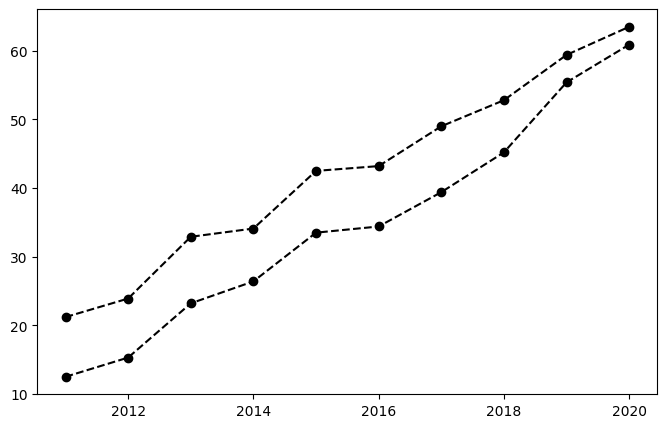

In [21]:
#某財務軟體公司在全國有許多代理商，為研究它的財務軟體產品的廣告投入與銷售額的關係，
#統計人員隨機選擇10家代理商進行觀察，搜集到年廣告投入費和月平均銷售額的數據，
#並編製成相關表
#相關係數
#https://medium.com/@chih.sheng.huang821/%E7%9B%B8%E9%97%9C%E4%BF%82%E6%95%B8%E8%88%87%E5%85%B1%E8%AE%8A%E7%95

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = {'年廣告費投入':[12.5, 15.3, 23.2, 26.4, 33.5, 34.4, 39.4, 45.2, 55.4, 60.9],
            '月均銷售額':[21.2, 23.9, 32.9, 34.1, 42.5, 43.2, 49.0, 52.8, 59.4, 63.5]}
dataFrame = pd.DataFrame(data, index=[2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])
dataFrame
'''
Out[1]: 
      年廣告費投入  月均銷售額
2020    12.5   21.2
2019    15.3   23.9
2018    23.2   32.9
2017    26.4   34.1
2016    33.5   42.5
2015    34.4   43.2
2014    39.4   49.0
2013    45.2   52.8
2012    55.4   59.4
2011    60.9   63.5

'''

figure = plt.figure(figsize=(8,5))
axes = figure.add_subplot(1,1,1)
axes.plot(dataFrame.index,dataFrame.values, 'ko--')
plt.show()

In [22]:
#相關係數
#相關係數很常用在機器學習或是統計分析上使用，主要衡量兩變數間「線性」關聯性的高低程度。
#https://medium.com/@chih.sheng.huang821/%E7%9B%B8%E9%97%9C%E4%BF%82%E6%95%B8%E8%88%87%E5%85%B1%E8%AE%8A%E7%95%B0%E6%95%B8-correlation-coefficient-and-covariance-c9324c5cf679

corration=dataFrame['年廣告費投入'].corr(dataFrame['月均銷售額'])
'''
Out[2]: 0.9941983762371884
'''

'\nOut[2]: 0.9941983762371884\n'

In [23]:
#共變異數

covariance=dataFrame['年廣告費投入'].cov(dataFrame['月均銷售額'])
'''
Out[3]: 228.01555555555558
'''

'\nOut[3]: 228.01555555555558\n'

In [24]:
resultFrame = pd.DataFrame({'相關係數':[corration],'共變異數':[covariance]},index=['值'])
resultFrame

'''
     相關係數  共變異數
值   0.994198 228.015556

'''

'\n     相關係數  共變異數\n值   0.994198 228.015556\n\n'

#### Apple,IBM,MFSF,Google股票分析

```
pip install pandas-datareader

```

In [25]:
import pandas_datareader.data as web
#台積電(2330.TW),聯電(2303.TW),聯發科(2454.TW),鴻海(2317.TW)
#print(web.get_data_yahoo('AAPL'))
'''
            High         Low        Open       Close      Volume  \
Date                                                                     
2015-04-13  128.570007  126.610001  128.369995  126.849998  36365100.0   
2015-04-14  127.290001  125.910004  127.000000  126.300003  25524600.0   
2015-04-15  127.129997  126.010002  126.410004  126.779999  28970400.0   
2015-04-16  127.099998  126.110001  126.279999  126.169998  28369000.0   
2015-04-17  126.139999  124.459999  125.550003  124.750000  51957000.0   
...                ...         ...         ...         ...         ...   
2020-04-03  245.699997  238.970001  242.800003  241.410004  32470000.0   
2020-04-06  263.109985  249.380005  250.899994  262.470001  50455100.0   
2020-04-07  271.700012  259.000000  270.799988  259.429993  50721800.0   
2020-04-08  267.369995  261.230011  262.739990  266.070007  42223800.0   
2020-04-09  270.070007  264.700012  268.700012  267.989990  40529100.0   

             Adj Close  
Date                    
2015-04-13  116.734917  
2015-04-14  116.228790  
2015-04-15  116.670502  
2015-04-16  116.109131  
2015-04-17  114.802368  
...                ...  
2020-04-03  241.410004  
2020-04-06  262.470001  
2020-04-07  259.429993  
2020-04-08  266.070007  
2020-04-09  267.989990  

'''
#將dataFrame儲存在dictionary內
all_data = {ticker: web.get_data_yahoo(ticker) for ticker in ['AAPL', 'IBM', 'MSFT', 'GOOG']}
price = pd.DataFrame({ticker: data['Adj Close'] for ticker, data in all_data.items()})
price

,AAPL,IBM,MSFT,GOOG
Date,,,,
2017-10-12,37.013550,110.816460,72.465797,49.391499
2017-10-13,37.248451,110.869240,72.813461,49.484001
2017-10-16,37.934143,110.665710,72.963814,49.599998
2017-10-17,38.074127,110.447136,72.907410,49.609001
2017-10-18,37.905666,120.237686,72.926208,49.640499
...,...,...,...,...
2022-10-05,146.399994,125.739998,249.199997,102.220001
2022-10-06,145.429993,122.230003,246.789993,102.239998
2022-10-07,140.089996,118.820000,234.240005,99.570000


In [26]:
volume = pd.DataFrame({ticker:data['Volume'] for ticker, data in all_data.items()})
volume

,AAPL,IBM,MSFT,GOOG
Date,,,,
2017-10-12,64500400.0,3414458.0,16876500.0,25248000.0
2017-10-13,65576800.0,2621904.0,15335700.0,23396000.0
2017-10-16,96486000.0,3192497.0,12380100.0,18210000.0
2017-10-17,75989200.0,6665530.0,16824000.0,25804000.0
2017-10-18,65496800.0,31892749.0,13300700.0,21152000.0
...,...,...,...,...
2022-10-05,79471000.0,3212900.0,20347100.0,18475500.0
2022-10-06,68402200.0,5074600.0,20239900.0,17156200.0
2022-10-07,85859100.0,4498200.0,37732400.0,24232300.0


In [27]:
price.loc['2016-02-02':'2018-01-01']

,AAPL,IBM,MSFT,GOOG
Date,,,,
2017-10-12,37.013550,110.816460,72.465797,49.391499
2017-10-13,37.248451,110.869240,72.813461,49.484001
2017-10-16,37.934143,110.665710,72.963814,49.599998
2017-10-17,38.074127,110.447136,72.907410,49.609001
2017-10-18,37.905666,120.237686,72.926208,49.640499
2017-10-19,37.008804,121.270287,73.208115,49.222500
2017-10-20,37.072865,122.152107,74.053772,49.410000
2017-10-23,37.053890,120.252800,74.072594,48.422501
2017-10-24,37.274544,117.486710,74.100769,48.527000


In [28]:
#和上一筆資料的平均差
returns = price.pct_change()

returns.tail()

,AAPL,IBM,MSFT,GOOG
Date,,,,
2022-10-05,0.002053,0.001912,0.001286,-0.001855
2022-10-06,-0.006626,-0.027915,-0.009671,0.000196
2022-10-07,-0.036719,-0.027898,-0.050853,-0.026115
2022-10-10,0.002356,-0.009005,-0.021303,-0.008637
2022-10-11,-0.010255,0.000425,-0.016750,-0.006686


In [29]:
## corr() 相關係數(線性關係)
returns['MSFT'].corr(returns['IBM'])

0.4880591967205261

In [30]:
## cov() 共變異數
returns['MSFT'].cov(returns['IBM'])

0.00016058151017928545

In [31]:
#4個股票的相關係數比較
returns.corr()

,AAPL,IBM,MSFT,GOOG
AAPL,1.000000,0.444639,0.762631,0.689930
IBM,0.444639,1.000000,0.488059,0.455133
MSFT,0.762631,0.488059,1.000000,0.792867
GOOG,0.689930,0.455133,0.792867,1.000000


In [32]:
price - price.shift(1)

,AAPL,IBM,MSFT,GOOG
Date,,,,
2017-10-12,NaN,NaN,NaN,NaN
2017-10-13,0.234901,0.052780,0.347664,0.092503
2017-10-16,0.685692,-0.203529,0.150352,0.115997
2017-10-17,0.139984,-0.218575,-0.056404,0.009003
2017-10-18,-0.168461,9.790550,0.018799,0.031498
...,...,...,...,...
2022-10-05,0.299988,0.239998,0.319992,-0.190002
2022-10-06,-0.970001,-3.509995,-2.410004,0.019997
2022-10-07,-5.339996,-3.410004,-12.549988,-2.669998
